In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  Making Money on Amazon's return

* Note that the data presented here is entirely fictional

* Online retailers are often stranded with product returns that they cannot sell
  * According to Yahoo Finance, it’s not uncommon for online retailers to see 30% of all products people ordered online returned
  * Clothing return rates can be close to 40%.
  * Returns at brick-and-mortar stores are around 8.89%

* Some online marketplaces sell returns online
  * items are bundled in huge pallets based on categories
* Online marketplaces like Direct Liquidation do the math and decide how products are bundled and how much the pallets cost
  * You decide to use DS Ninja skill to see whether buying and reselling pallets will afford you the benefit of buying your own Gulfstream 550 


### Data
* We have access to all the pallet value and cost from a marketplace `RUNDLE` (Bundle of Returns) for 2017.

* There are 103,245 records

* Dataset contains three columns:

| Column         | Description                                 |
|----------------|---------------------------------------------|
| Transaction ID | Random String of size 10                    |
| MSRP           | Total Manufacturer's Suggested Retail Price |
| Bought Price     | Price at which the pallet was purchased     |
| Sold Price      | Price at which the pallet was sold          |



Lets create an array of length 103245 with strings of 10 characters:

In [4]:
transaction_id =  pd.util.testing.rands_array(10, 103245)
transaction_id

array(['v4z1lJsAH4', 'rUttbeseqm', 'nLAxgGVj0k', ..., 'GBpcDjXa69',
       'zUM7yiHWnN', 'upsG0lNMiX'], dtype=object)

Draw random samples from a normal (Gaussian) distribution with the following parameters:
- The mean (center) to be 500.
- A standard deviation (spread) of 80.
- Draw as many samples as the length of our random dataset above (transaction_id).

In [5]:
msrp= np.random.normal(500, 80, len(transaction_id))
np.random.normal()

-0.5170094581710402

Using the techniques above, create a dataframe with the following features: 
- **Transaction ID** Random string of size 10
- **MSRP** The list price or manufacturer's suggested retail price (MSRP) from a normal distribution
- **Bought price** From a normal distribution
- **Sold price** From a normal distribution

In [6]:
msrp= np.random.normal(500, 80, len(transaction_id))

bought_price = np.random.normal(msrp * 0.5, (msrp * 0.5)/8, len(transaction_id))

sold_price = np.random.normal(msrp * 0.83, 25)

returns_data = pd.DataFrame({"Transaction ID": transaction_id, "MSRP": msrp, 
                             "Bought Price": bought_price, "Sold Price": sold_price})


returns_data.head()


,Transaction ID,MSRP,Bought Price,Sold Price
0,v4z1lJsAH4,523.533881,241.453985,417.606419
1,rUttbeseqm,618.712196,340.188788,542.822157
2,nLAxgGVj0k,559.834218,242.051777,463.980204
3,Fq31gNoRW5,452.787986,215.381672,386.624053
4,ntKFW6jL0V,515.926063,238.885471,424.601772


### What is the cost to the Marketplace?
- Is the marketplace buying returns at a set cost?
    - Does the marketplace get a fixed discount (ex. 10%) on the MSRP?
- What can infer about the buying strategy?
    - Does the marketplace buy at auction?
    
---
By plotting the difference between the original value (MSRP) and the bought price,
we see all products are bought for less than the original value.

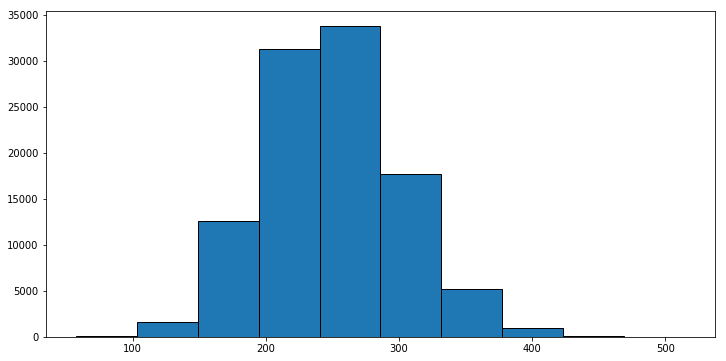

In [7]:
plt.figure(figsize=(12,6))
_ = plt.hist(returns_data["MSRP"]- returns_data["Bought Price"], edgecolor='k')

In [8]:
np.mean(returns_data["Bought Price"] / returns_data["MSRP"])

0.5000757019625451

### Working with a Sample of the Population

* It looks like the marketplace is consistently paying around 50% of the original value
  * Perhaps they are buying at a Dutch auction ( open descending price auction) with starting point around 50% of the original value?

* Note that, according to our definition, this is the complete population.
  * We are interested in all the purchases in 2017 and we have access to all the data
  * We are not interested in prior or subsequent years

* What if we have access to a small subsample of the population, could we have arrived at the same conclusion?
  * Ex. what if we managed to get access to only 50 records?

* We can sample 50 random entries using `returns_data.sample`

```python
returns_data_100 = returns_data.sample(50)
```

In [9]:
returns_data_100 = returns_data.sample(50, random_state=100)
sample_mean = np.mean(returns_data_100["Bought Price"] / returns_data_100["MSRP"])
sample_mean

0.4892113232680452

### Using Bootstrap to estimate the Population Mean

* Are 50 records sufficient to obtain a good estimate of the sample population mean?
* How confident will we be in this result?
  * What is the range of possible means of the population?
----
To test this, lets do the operation above 10 000 times and save each mean calculation for that specific population.

In [10]:
bootstrap_means = []
for i in range(10000):
    returns_data_100_bootstrap = returns_data_100.sample(100, replace=True)
    bootstrap_mean = np.mean(returns_data_100_bootstrap["Bought Price"] 
                             / returns_data_100_bootstrap["MSRP"])
    bootstrap_means.append(bootstrap_mean)


In [11]:
np.percentile(bootstrap_means, (2.5, 97.5) )

array([0.4784263 , 0.50043014])

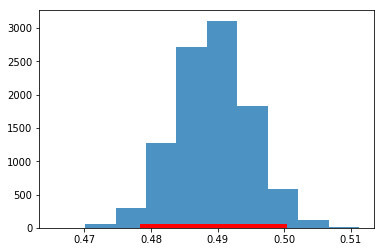

In [12]:
_ = plt.hist(bootstrap_means, alpha=0.8)
conf_int_95 = np.percentile(bootstrap_means, (2.5, 97.5) ) 
plt.hlines(0, conf_int_95[0], conf_int_95[1], color="red", linewidth=8)

### Interpreting the Bootstrap Values

* The bootstrap data shows us the extent for sampling variability

* The 95% confidence interval contains our mean
  * Values within 95% confidence interval are not a fluke.
  * We cannot discredit the fact that any of those values are possible means of the population

* Conclusion, even with only 50 samples, we can observe that the company is buying products, on average, at 48% to 50% discount

* Question was it a fluke that the true population  mean was included in the 95% confidence interval?
  * Again, we know the true population mean because we have access to the complete population



### How Confident are we in the Bootstrap Confidence Interval?

The "middle 95%" interval of estimates captured the parameter in our example. In order to check to see that out results were not a fluke, we run another simulation. To see how frequently the interval contains the parameter, we have to run the entire process a series of times. In our example, we will repeat the process 100 times to end up with 100 intervals. We then count how many of the intervals contain the population median. We run this in order to see how many of these 95% confidence intervals contain our mean. In theory, 95 of the 100 intervals should contain the mean.


In [ ]:
def comput_conf_interval(data, nb_bootstrap_iters = 5000):
    bootstrap_means = []
    for i in range(nb_bootstrap_iters):
        bootstrap_sample = data.sample(data.shape[0], replace=True)
        bootstrap_mean = np.mean(bootstrap_sample["Bought Price"] 
                             / bootstrap_sample["MSRP"])
        bootstrap_means.append(bootstrap_mean)
    #print(np.percentile(bootstrap_means, (2.5, 97.5)))
    return np.percentile(bootstrap_means, (2.5, 97.5))
    
lower_bound = []
upper_bound = []
for i in range(100):
    sample_of_50 = returns_data.sample(50)
    conf_interval = comput_conf_interval(sample_of_50)
    lower_bound.append(conf_interval[0])
    upper_bound.append(conf_interval[1])


In [ ]:
conf_ints_95 = pd.DataFrame({"lower": lower_bound, "upper": upper_bound})
conf_ints_95.head()

With the generated data, we create a chart that shows the lowest and highest values (means) of each interval (100 times). Then sum the "lower" values that are below .5 and sum the "upper" values that are above .5 in order to see how many of our intervals fit within our projected 95% confidence interval. The goal is to see if the range of values (means) do not include the true mean (.5). The cases where the "lower" value is above .5 or when the "upper" value is below .5 are outlyers that fit within our 5% error rate.

In [ ]:
sum((conf_ints_95["lower"] < 0.5) & (conf_ints_95["upper"] > 0.5))

We see that 94 intervals fit within these bounds, giving us a 94% rate at which our true mean is included in the intervals. Below is a visualization of each of the intervals where each  interval is marked as a blue or orange horizontal line where, the x axis represents the range of means while the y axis represents the intervals, the blue represents intervals that have means that contain the true mean, the orange are those that don't, and where the vertical orange bar/line represents the true mean.

In [ ]:
plt.figure(figsize=(10,6))
plt.vlines(0.5, 0, 102, color="#e2a829", linewidth=4)
for i in range(100):
    c = "blue"
    if lower_bound[i] > 0.5 or upper_bound[i] < 0.5:
        c = "red"
    plt.hlines(i,lower_bound[i], upper_bound[i], color=c, alpha=0.85, linewidth=0.75)
    

### How Confident are we in the Bootstrap Confidence Interval?

If an interval doesn't cover the parameter, it's a dud. There are very few of them, but they do happen. Any method based on sampling has the possibility of being off. If we have a 95% confidence interval, we should expect to be wrong 5% of the time. In our case, we were wrong 6% of the time, which can be considered a relatively successful sampling. The beauty of methods based on random sampling is that we can quantify how often they are likely to be off



### The Bootstrap Confidence Interval

Our interval of estimates is called a *95% confidence interval* for the parameter. 95% is called the *confidence level* of the interval. We say that we are *95% confident* that the process results in a good interval

### Care in Using the Bootstrap ###


Bootstrapping is a versitile technique that has a variety of mechanisms able to deal with different problems, however it relies upon one assumption: the data accurately represent the true population. This assumption can be difficult to verify especially in the context of small sample sizes (it could be that a small sample is an accurate reflection of the true population!). If the original sample on which the bootstrap distribution, and hence all of the results that follow from it, is not adequately accurate, then your results and most likely your decision based upon those results will be flawed. Although bootstrapping is under some conditions asymptotically consistent, it does not provide general finite-sample guarantees. The apparent simplicity may conceal the fact that important assumptions are being made when undertaking the bootstrap analysis where these would be more formally stated in other approaches. There is a lot of ambiguity with the bootstrap and using caution before applying it would be wise.

The bootstrap is an elegant and powerful method to assess the accuracy of the estimate. The bootstrap just uses a different approach to estimating the standard error. There are a few things to know and are encouraged to do when using bootstrap in order to fully utilize this method. Using and starting with a large, random sample is highly recommended. The Bootstrap percentile method works well for estimating the population median or mean based on a large sample size. Also, in order to approximate the probability distribution of a statistic, it is a good idea to replicate the resampling procedure as many times as possible. For example, 10,000 times in general is a good estimate. 



### When To Not Use the Bootstrap

    The bootstrap is not expected to do well in a few situations. One situation would be when the goal is to estimate the minimum or maximum value in the population, or a very low or very high percentile, or parameters that are greatly influenced by rare elements of the population. Also when the the probability distribution of the statistic is not roughly bell-shaped. In our example, if the statistic is not roughly bell-shaped, our confidence interval would lower. This would result in intervals that result in errors(duds) more frequently making the credibility of the data sample lower. The final situation is when original sample is very small, say less than 20 or 25. The problem with small data in regards to Bootstrapping is how it handles outliers. With small data, even a few outliers will form large portions of the projected model. This means that the data has a higher chance of having a larger error %, meaning a lower confidence interval.


dragicedragice 617, and mmmmmmmmmmmmmmmmmmmm 3171313. “Why Not Always Use Bootstrap CIs?” Cross Validated, 2019 Stack Exchange Inc, 8 June 2014, stats.stackexchange.com/questions/99988/why-not-always-use-bootstrap-cis.

EDUPRISTINE. “Problems of Small Data and How to Handle Them.” Problems of Small Data and How to Handle Them, EduPristine, 15 Feb. 2016, www.edupristine.com/blog/managing-small-data.

"Bootstrapping (statistics)" Wikipedia: The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 8 Feb 2019. Web. 12 Feb 2019, en.wikipedia.org/wiki/Bootstrapping_(statistics)

